# ~DATA 1: EMAIL SPAM

In [1]:
import pandas as pd
df1 = pd.read_csv("email data.csv")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [2]:
df1.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


## Data Preprocessing

In [3]:
# Mengecek missing value
df1.isna().sum()

Category    0
Message     0
dtype: int64

In [4]:
# Mengecek duplikasi
df1.duplicated().sum()

415

In [5]:
# Menghapus baris data yang duplikat
df1.drop_duplicates(inplace=True)

In [6]:
df1['Category'].value_counts()

ham               4516
spam               641
{"mode":"full"       1
Name: Category, dtype: int64

In [7]:
df1 = df1[df1['Category'] != '{"mode":"full"']

## Visualisasi Data

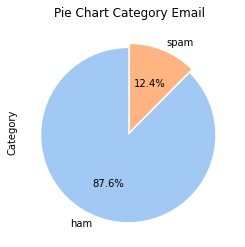

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
category = df1["Category"].value_counts()
category.plot(kind='pie', labeldistance = 1.1, 
            explode=[0.05, 0,], 
           autopct='%1.1f%%',
           startangle=90,
            colors = sns.color_palette('pastel')[0:2])

plt.title('Pie Chart Category Email')
plt.show()

In [9]:
df1.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4516   4516  Go until jurong point, crazy.. Available only ...   
spam         641    641  Free entry in 2 a wkly comp to win FA Cup fina...   

               
         freq  
Category       
ham         1  
spam        1

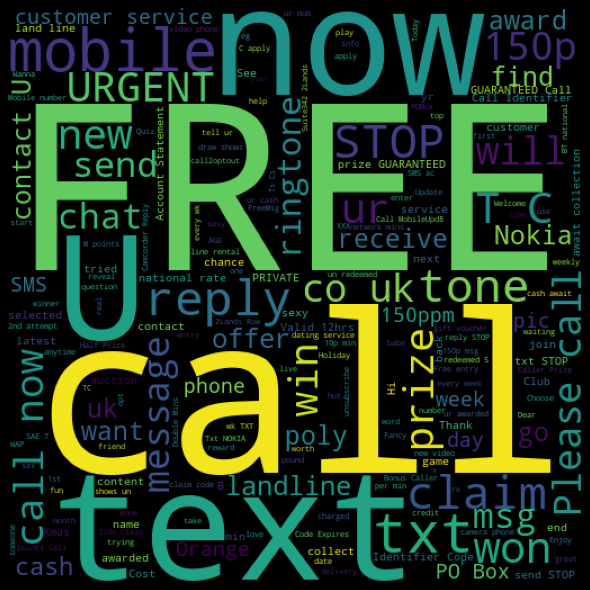

In [10]:
from wordcloud import WordCloud
spam_words = ' '.join(list(df1[df1['Category'] == 'spam']['Message']))
spam_wc = WordCloud(width = 512, height = 512,font_path=None).generate(spam_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

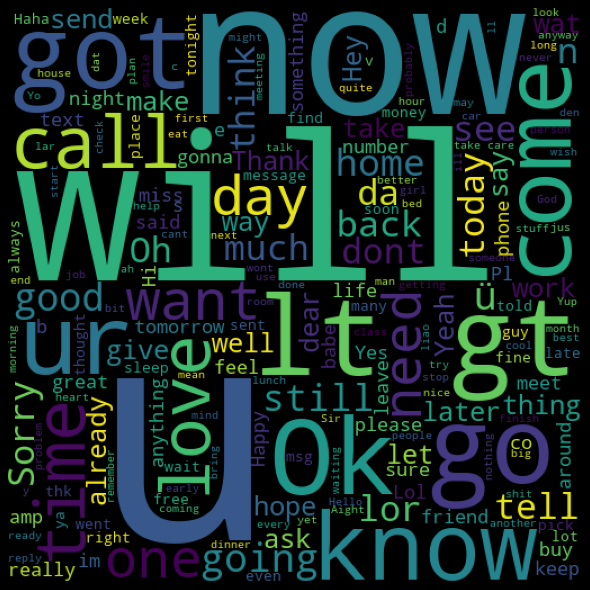

In [11]:
from wordcloud import WordCloud
spam_words = ' '.join(list(df1[df1['Category'] == 'ham']['Message']))
spam_wc = WordCloud(width = 512, height = 512,font_path=None).generate(spam_words)
plt.figure(figsize = (10,8), facecolor = 'k')
plt.imshow(spam_wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [12]:
# Encoding atau Mengubah data string ke numerik
df1['Category']=df1['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [13]:
X = df1['Message']
y = df1['Category']

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
# Count Vectorizer to convert words into a matrix of features
v = CountVectorizer()
X_count = v.fit_transform(X.values)
X_count.toarray()[:2]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [18]:
## Splitting Dataset : Training dan Testing Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_count, y, test_size=0.3, random_state=5)

# Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
y_pred = model.fit(X_train, y_train).predict(X_test)

In [29]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(' ')
print('Confusion Metrix: \n', metrics.confusion_matrix(y_test, y_pred))
print('')
target_names=['ham','spam']
print('Classification Report: \n', metrics.classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.9799741602067183
 
Confusion Metrix: 
 [[1335   16]
 [  15  182]]

Classification Report: 
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99      1351
        spam       0.92      0.92      0.92       197

    accuracy                           0.98      1548
   macro avg       0.95      0.96      0.96      1548
weighted avg       0.98      0.98      0.98      1548



# Desicion Tree

In [30]:
from sklearn.tree import DecisionTreeClassifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_dt = clf.predict(X_test)

In [31]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print(' ')
print('Confusion Metrix: \n', metrics.confusion_matrix(y_test, y_pred_dt))
print('')
print('Classification Report: \n', metrics.classification_report(y_test, y_pred_dt, target_names=target_names))

Accuracy: 0.9638242894056848
 
Confusion Metrix: 
 [[1334   17]
 [  39  158]]

Classification Report: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1351
           1       0.90      0.80      0.85       197

    accuracy                           0.96      1548
   macro avg       0.94      0.89      0.91      1548
weighted avg       0.96      0.96      0.96      1548



# Regresi Logistik

In [39]:
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression(random_state=20)

# fit the model with data
logreg.fit(X_train, y_train)

y_pred_reg = logreg.predict(X_test)

In [40]:
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_reg))
print(' ')
print('Confusion Metrix: \n', metrics.confusion_matrix(y_test, y_pred_reg))
print('')
print('Classification Report: \n', metrics.classification_report(y_test, y_pred_reg,  target_names=target_names))

Accuracy: 0.9735142118863049
 
Confusion Metrix: 
 [[1346    5]
 [  36  161]]

Classification Report: 
               precision    recall  f1-score   support

         ham       0.97      1.00      0.98      1351
        spam       0.97      0.82      0.89       197

    accuracy                           0.97      1548
   macro avg       0.97      0.91      0.94      1548
weighted avg       0.97      0.97      0.97      1548

